# Question 1.

## a)

In [1]:
import numpy as np
from matplotlib import pyplot as plt
import time as tim

Below is the code given in the assignment for calculating gradient descent.

In [2]:
def gradient_descent(gradient,init_,learn_rate,n_iter=50,tol=1e-06):
    x = init_
    for _ in range(n_iter):
        delta = -learn_rate*gradient(x)
        if np.all(np.abs(delta) <= tol):
            break
        x += delta
    return round(x*1000)/1000

Now as per question 1,a I have shown below the functions for calculation the gradient for the polynomial function 
$ x^2 + 3x + 4 $

In [3]:
def First(x):
    return 2*x+3

Now to find the minima for the function we can use the gradient descent algorithm to reach the lower extremum we have set the initial value to be 0 and the learning rate here I have set a bit high that is 0.1 cause it works fine with it

In [4]:
minima1 = gradient_descent(gradient = First,init_ = 0,learn_rate = 0.1)
print("The minima for first one is at x="+str(minima1))

The minima for first one is at x=-1.5


Now for the second polynomial function $ x^4 – 3x^2 + 2x$ the gradient function is given below

In [5]:
def second(x):
    a = 4*(x**3)
    b = 6*x
    return a-b+2

Now to find the minima for the function we can use the gradient descent algorithm to reach the lower extremum we have set the initial value to be 0 and the learning rate is 0.01.

In [6]:
minima2 = gradient_descent(gradient = second,init_ = 0,learn_rate = 0.01)
print("The minima for Second one is at x ="+str(minima2))

The minima for Second one is at x =-1.357


## b)

Now to calculate the gradient for Loss function of the regression $y = ax+b$ we differentiate the loss function
$\frac{1}{N} * \sum_{i=0}^N (y_i-y_{pred}^i) $ which uses the mean square error.

After differentiation we found the gradient as a vector of partial derivatives once with respect to a and once with b

$D_a = \frac{-2}{N}\sum_{i=0}^N (y_i-y_{pred}^i)x_n $ 
$D_b = \frac{-2}{N}\sum_{i=0}^N (y_i-y_{pred}^i) $ 
Below function used the above and return gradients given X,Y,a and b

In [7]:
def gradient(X,Y,a,b):
    n = len(X)
    Y_pred = a*X+b
    D_a = (-2/n) * np.dot(X,(Y - Y_pred))
    D_b = (-2/n) * sum(Y - Y_pred)
    return D_a,D_b

The below function is same as above gradient descent function just it takes arguments of X,Y also with the weights.

In [8]:
def mygradient_descent(gradient,X,Y,init_a,init_b,learn_rate,n_iter=50,tol=1e-06):
    a = init_a
    b = init_b
    for _ in range(n_iter):

        d_a,d_b = gradient(X,Y,a,b)
        delta_a,delta_b = -learn_rate*d_a,-learn_rate*d_b

        if np.all(np.abs([delta_a,delta_b]) <= tol):
                break

        a += delta_a 
        b += delta_b
    return a,b

## c)
Below function is given in the question to generate random data

In [9]:
def generaterandomdata():
    np.random.seed(0)
    X = 2.5*np.random.randn(10000)+1.5
    res = 1.5*np.random.randn(10000)
    y = 2+0.3*X+res
    return X,y

In [10]:
X,Y = generaterandomdata()
res = mygradient_descent(gradient,X,Y,0,0,0.01,1000,1e-06)
print("The parameters a and b after being updated to minimise the Loss is a = "+str(res[0])+" b = "+str(res[1]))

The parameters a and b after being updated to minimise the Loss is a = 0.2953318623386959 b = 2.02321971821676


# d)
Now,Lets implement Minibatch stochastic gradient descent there are two ways to implement this algorithm 
1.We take B indices randomly (let's say it is the batch size) i.e. data points, compute gradient using those and then update weights. And repeat this for N iterations as explained in the course slides.
2.We shuffle the data, then iterate on the whole data in sets of 100 and update the weights after computing gradient for each set. And we repeat this for N iterations.
I have implemented the First one below as per the course.

In [11]:
def minibatchsgd(gradient,X,Y,learn_rate,batch_size = 50,n_iter = 50,tol=1e-06):
    n_obs = X.shape[0]
    a = 0
    b = 0
    
    for _ in range(n_iter):
        
        index = np.random.permutation(len(X))
        X = X[index]
        Y = Y[index]
        
        x_batch,y_batch = X[0:batch_size],Y[0:batch_size]
        d_a,d_b = gradient(x_batch, y_batch,a,b)
        delta_a,delta_b = -learn_rate*d_a,-learn_rate*d_b
        
        if np.all(np.abs([delta_a,delta_b]) <= tol):
                break
        
        a += delta_a
        b += delta_b
        
    return a,b

In [12]:
X,Y = generaterandomdata()
res = minibatchsgd(gradient,X,Y,learn_rate = 0.01,batch_size = 100,n_iter = 500)
print("For learning rate at 0.01 and batchsize as 100 and iteration as 500 minibatch sgd gives optimal values of a and b for linear \nregression y = ax+b Loss minimisation as a = "+str(res[0])+", b = "+str(res[1]))

For learning rate at 0.01 and batchsize as 100 and iteration as 500 minibatch sgd gives optimal values of a and b for linear 
regression y = ax+b Loss minimisation as a = 0.3159717425712388, b = 2.0363174620297104


## e)

Now for this question we'll first try for using minibatch sgd as sgd just by putting batchsize = 1,as per the course defination
So,we dont need to implement new SGD algorithm we can reuse the above.

In [13]:
X,Y = generaterandomdata()
res = minibatchsgd(gradient,X,Y,learn_rate = 0.01,batch_size = 1,n_iter = 500)
print("For learning rate at 0.01 and batchsize as 1 and iteration as 500 minibatch sgd gives optimal values of a and b for linear \nregression y = ax+b Loss minimisation as a = "+str(res[0])+" b = "+str(res[1]))

For learning rate at 0.01 and batchsize as 1 and iteration as 500 minibatch sgd gives optimal values of a and b for linear 
regression y = ax+b Loss minimisation as a = 0.03545573877167239 b = 1.9075919586872565


This was actually very fast for our data but as we can see above the accuracy is way too low.So,lets try the same algorithm with some more iteration as its faster it can do more iteration quickly

In [14]:
X,Y = generaterandomdata()
res = minibatchsgd(gradient,X,Y,learn_rate = 0.01,batch_size = 1,n_iter = 10000)
print("For learning rate at 0.01 and batchsize as 1 and iteration as 10000 minibatch sgd gives optimal values of a and b for linear \nregression y = ax+b Loss minimisation as a = "+str(res[0])+" b = "+str(res[1]))

For learning rate at 0.01 and batchsize as 1 and iteration as 10000 minibatch sgd gives optimal values of a and b for linear 
regression y = ax+b Loss minimisation as a = 0.2874303279336194 b = 2.411947034850882


So,now with these many iterations it algorithm became a bit slow although the accuracy increased but still less accurate than 
gradient descent and minibatch stochastic gradient descent.Hence can be used for larger dataset accuracy will get hit but the algorithm works quite faster than other two.

Lets,now try to find an optimal Batchsize for Minibatch SGD.

In [15]:
X,Y = generaterandomdata()
a = 0.3
b = 2
Error = []
minimum = 10000
minbatch = 1
for batchsize in range(50,1000,25):
    res = minibatchsgd(gradient,X,Y,learn_rate = 0.01,batch_size = batchsize,n_iter = 500)
    mse = ((a-res[0])**2+(b-res[1])**2)/2
    if minimum > mse:
        minimum = mse
        minbatch = batchsize
    Error.append(mse)


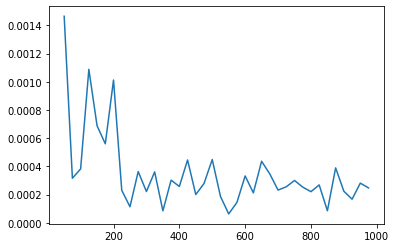

In [16]:
batchsize = [i for i in range(50,1000,25)]
plt.plot(batchsize,Error)

#### Optimal Batch size:

In [17]:
print("The optimal Batchsize is = "+str(minbatch)+" For the given data Data")

The optimal Batchsize is = 550 For the given data Data


Now lets compare the time taken by each algorithm

In [19]:
X,Y = generaterandomdata()
tic = tim.process_time()
res = mygradient_descent(gradient,X,Y,0,0,learn_rate = 0.001,n_iter = 10000)
toc = tim.process_time()
timeofgd = toc-tic
print("For gradient descent Time takin with learning rate 0.001 and iteration 10000 is "+str(toc-tic))
tic = tim.process_time()
res2 =  minibatchsgd(gradient,X,Y,learn_rate = 0.001,batch_size = 100,n_iter = 10000)
toc = tim.process_time()
print("For minibatch stochastic gd Time takin with learning rate 0.001 and iteration 10000 is "+str(toc-tic))
tic = tim.process_time()
res3 =  minibatchsgd(gradient,X,Y,learn_rate = 0.001,batch_size = 1,n_iter = 10000)
toc = tim.process_time()
timeofsgd = toc-tic
print("For stochastic gd Time takin with learning rate 0.001 and iteration 10000 is "+str(toc-tic))
print("Improvement in terms of time from Gradient descent to Stochastic Gradient Descent is = "+str((timeofsgd/timeofgd)*100)+"%age")

For gradient descent Time takin with learning rate 0.001 and iteration 10000 is 14.6875
For minibatch stochastic gd Time takin with learning rate 0.001 and iteration 10000 is 9.859375
For stochastic gd Time takin with learning rate 0.001 and iteration 10000 is 5.734375
Improvement in terms of time from Gradient descent to Stochastic Gradient Descent is = 39.04255319148936%age


From the above we can clearly see that for this data sgd is way more faster than other two and basically time for </br>Gradient descent > Minibatch Stochastic Gradient Descent > Stochastic Gradient Descent.

# Question no 2.

(i) The probability that someone has both cold and a fever
    According to the given Bayesian Network the fever is dependent on cold.Hence,
    $P(Fever,Cold) = P(Cold)*P(\frac{Fever}{Cold}) = 0.02 * 0.307 = 0.00614$(Answer)</br>
    

(ii)The probability that someone who has a cough has a cold.
</br></br>
$
P(\frac{Cold}{Cough}) = \frac{P(Cold,Cough)}{P(Cough)}
$</br></br>
Lets First calculate the probability of Lung Disease</br>
$
P(Lung) = P(Lung,Smoke)+P(Lung,NoSmoke) = (0.2*0.1009) + (0.8*0.001) = 0.02098$</br>$
P(NoLung) = 1-P(Lung) = 0.97902
$</br>
</br>Now Lets Calculate Final result:</br>
</br>$
\frac{P(Cold,Cough)}{P(Cough)} = \frac{P(Cold,Cough)}{P(Cold,Cough)+P(Cold,NoCough)} = \frac{(0.7575*0.02*0.02098)+(0.505*0.02*0.97902)}{(0.7575*0.02*0.02098)+(0.505*0.02*0.97902)+(0.505*0.98*0.02098)+(0.01+0.98+0.97902)}
$</br></br>
$
 = \frac{0.000318+0.00989}{0.000318+0.00989+0.01038+0.00959} = 0.3382$(approx)(Answer)


## Question no 3.

The probability mass function is given as $$ f(X1,X2,....,Xk) = \frac{n!}{x1!,x2!,...,xk!}P_1^ {x1}...P_k^ {xk}$$

where $\sum_{i=1}^{k} x_i = n$ and $\sum_{i=1}^{k} P_i = 1$

The likelihood could be then written as joint probability:$L(\mathbf{p}) = {{n}\choose{x_1, ..., x_m}}\prod_{i=1}^m p_i^{x_i} \\
= n! \prod_{i=1}^m \frac{p_i^{x_i}}{x_i!}$

Then The log liklihood is : $l(\mathbf{p}) = \log L(\mathbf{p}) = \log \bigg( n! \prod_{i=1}^m \frac{p_i^{x_i}}{x_i!} \bigg)$</br>
$= \log n! + \log \prod_{i=1}^m \frac{p_i^{x_i}}{x_i!}\\
= \log n! + \sum_{i=1}^m \log \frac{p_i^{x_i}}{x_i!} \\
= \log n! + \sum_{i=1}^m x_i \log p_i - \sum_{i=1}^m \log x_i!
$

After putting a constraint with Lagrange multiplier i.e $\sum_{i=1}^m p_i = 1$</br>
$l'(\mathbf{p},\lambda) = l(\mathbf{p}) + \lambda\bigg(1 - \sum_{i=1}^m p_i\bigg)$

For finding the maximum p for $ L(\mathbf{p},\lambda)$

$\frac{\partial}{\partial p_i} l'(\mathbf{p},\lambda)= \frac{\partial}{\partial p_i} l(\mathbf{p})
+ \frac{\partial}{\partial p_i} \lambda\bigg(1 - \sum_{i=1}^m p_i\bigg) = 0$
</br>
$ \frac{\partial}{\partial p_i} \sum_{i=1}^m x_i \log p_i
- \lambda \frac{\partial}{\partial p_i} \sum_{i=1}^m p_i = 0 $</br>$ 
\frac{x_i}{p_i}- \lambda  = 0 $</br>$
p_i = \frac{x_i}{\lambda} $

Thus,

$p_i = \frac{x_i}{n}$, because $p_i = \frac{x_i}{\lambda} $</br>
$\sum_{i=1}^m p_i = \sum_{i=1}^m \frac{x_i}{\lambda} $</br>
$1 = \frac{1}{\lambda} \sum_{i=1}^m x_i $</br>
$\lambda = n$

distribution that maximizes the likelihood is :
$\mathbf{p} = (\frac{x_1}{n},
...,
\frac{x_m}{n})$